# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
rocket = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/RocketLaunchDataCSV.csv')
# rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


# 데이터 탐색 및 전처리

In [3]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

## 자료형 변환

In [4]:
# rocket['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [5]:
def time_to_decimal(time_str):
    try:
        # 시간과 분을 분리
        hours, minutes = map(int, time_str.split(':'))
        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
        return hours + minutes/60
    except:
        return None

# 컬럼에 적용
rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)

# 확인
print("변환된 값 샘플:", rocket['Day Length'].head())
print("데이터 타입:", rocket['Day Length'].dtype)

변환된 값 샘플: 0    10.433333
1    10.433333
2    10.416667
3    10.416667
4    12.400000
Name: Day Length, dtype: float64
데이터 타입: float64


## object 타입인 변수의 데이터 분포 확인

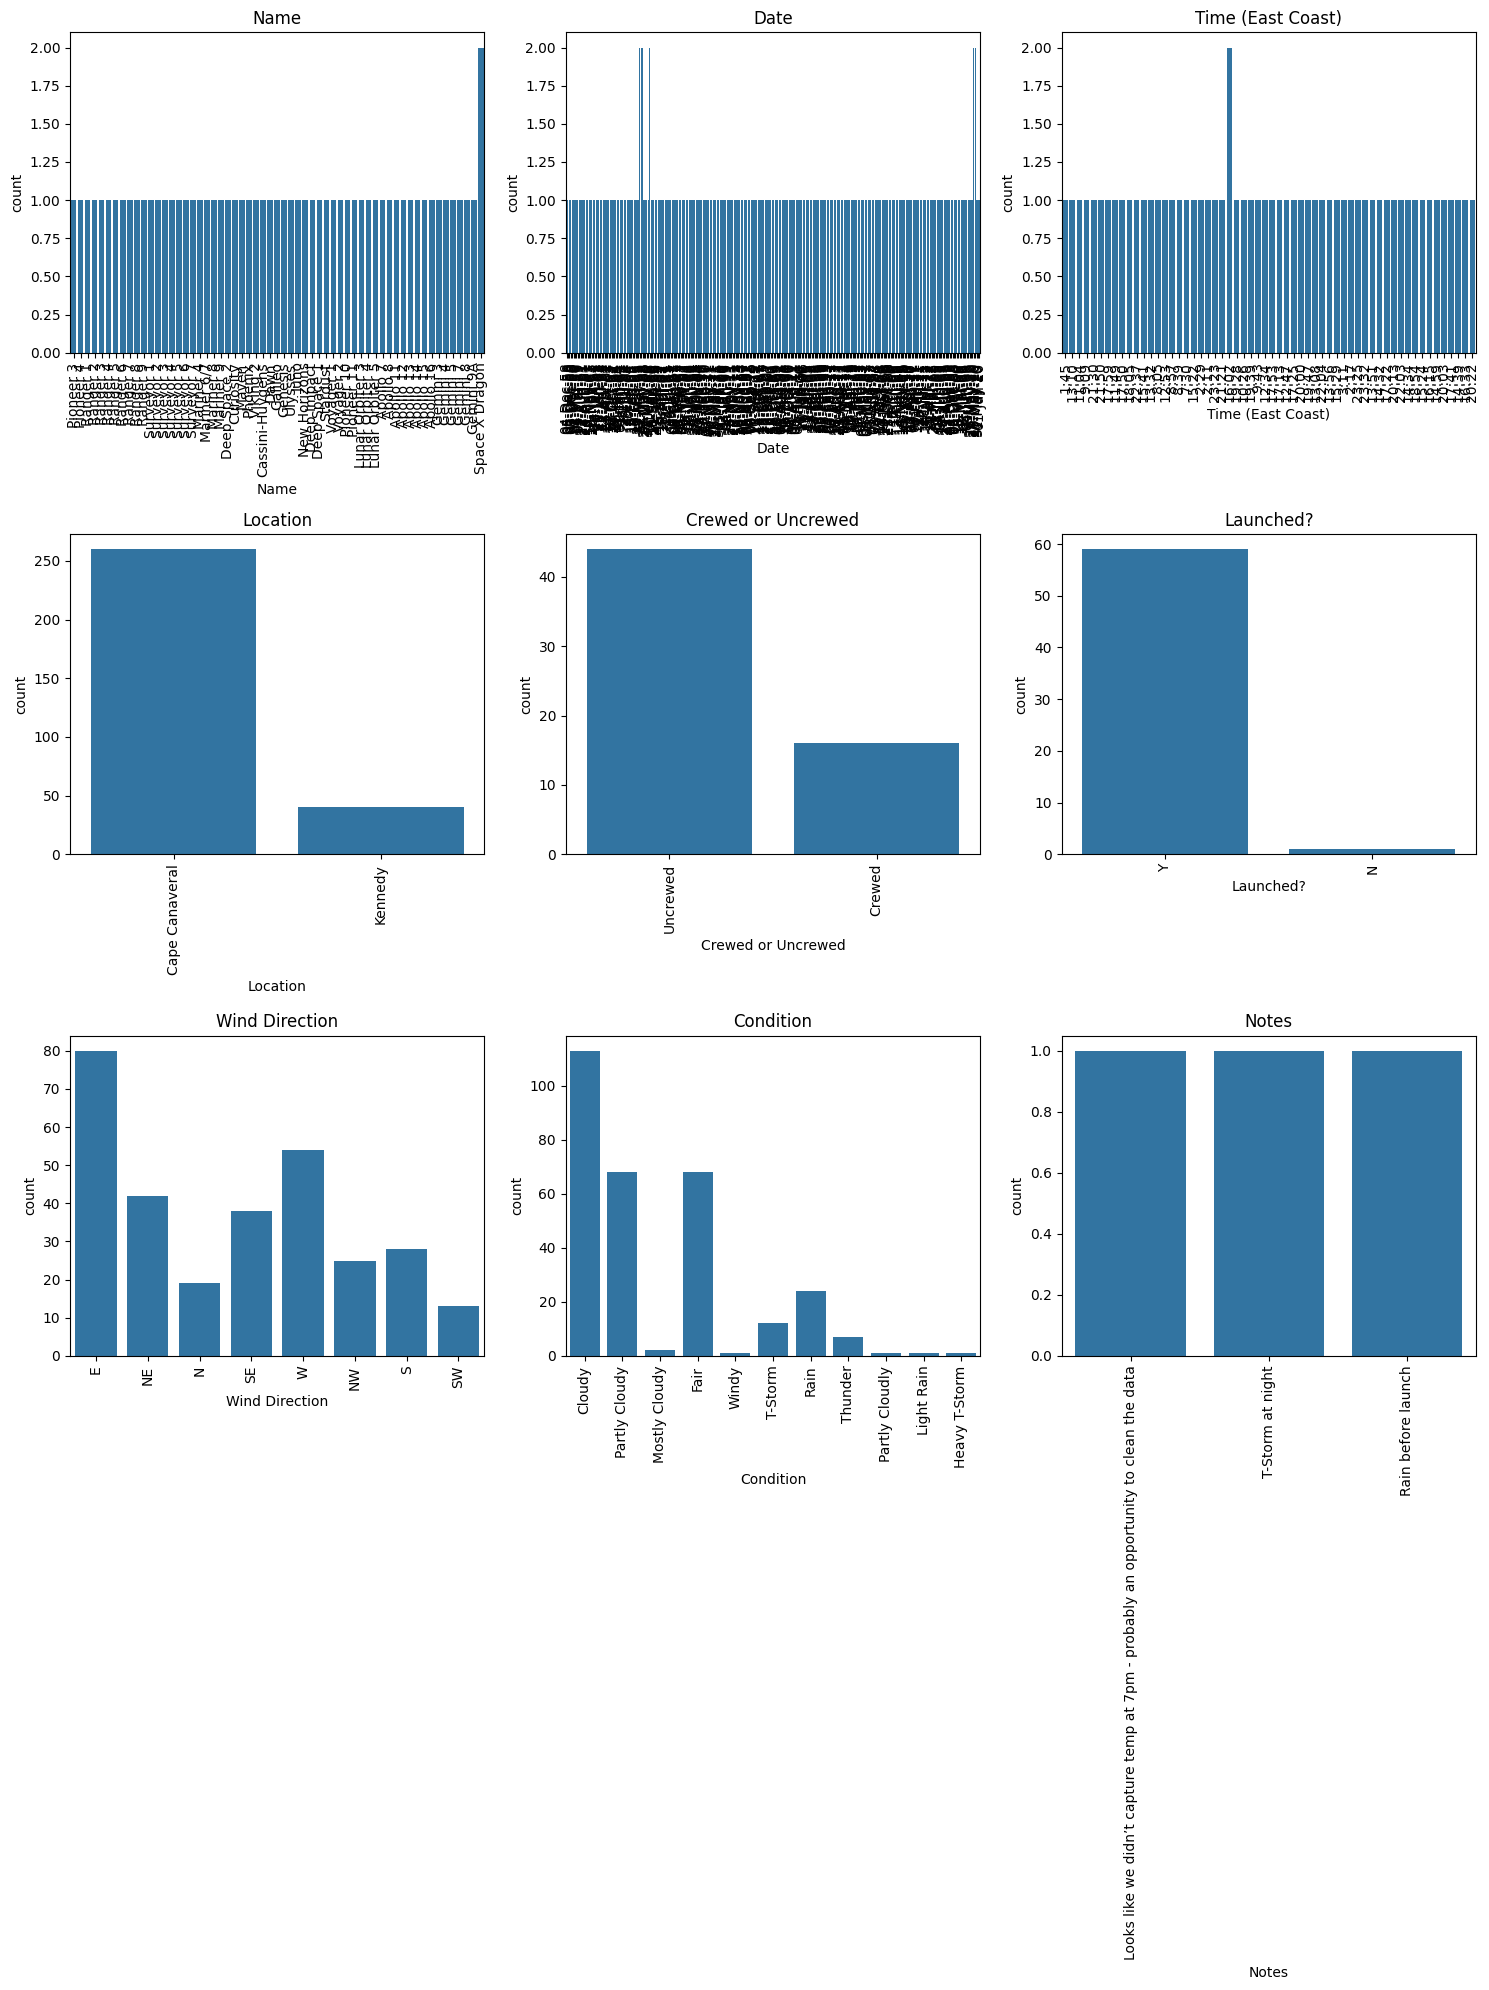

In [6]:
# 데이터타입이 object인 컬럼 추출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## float 타입인 데이터의 분포 확인

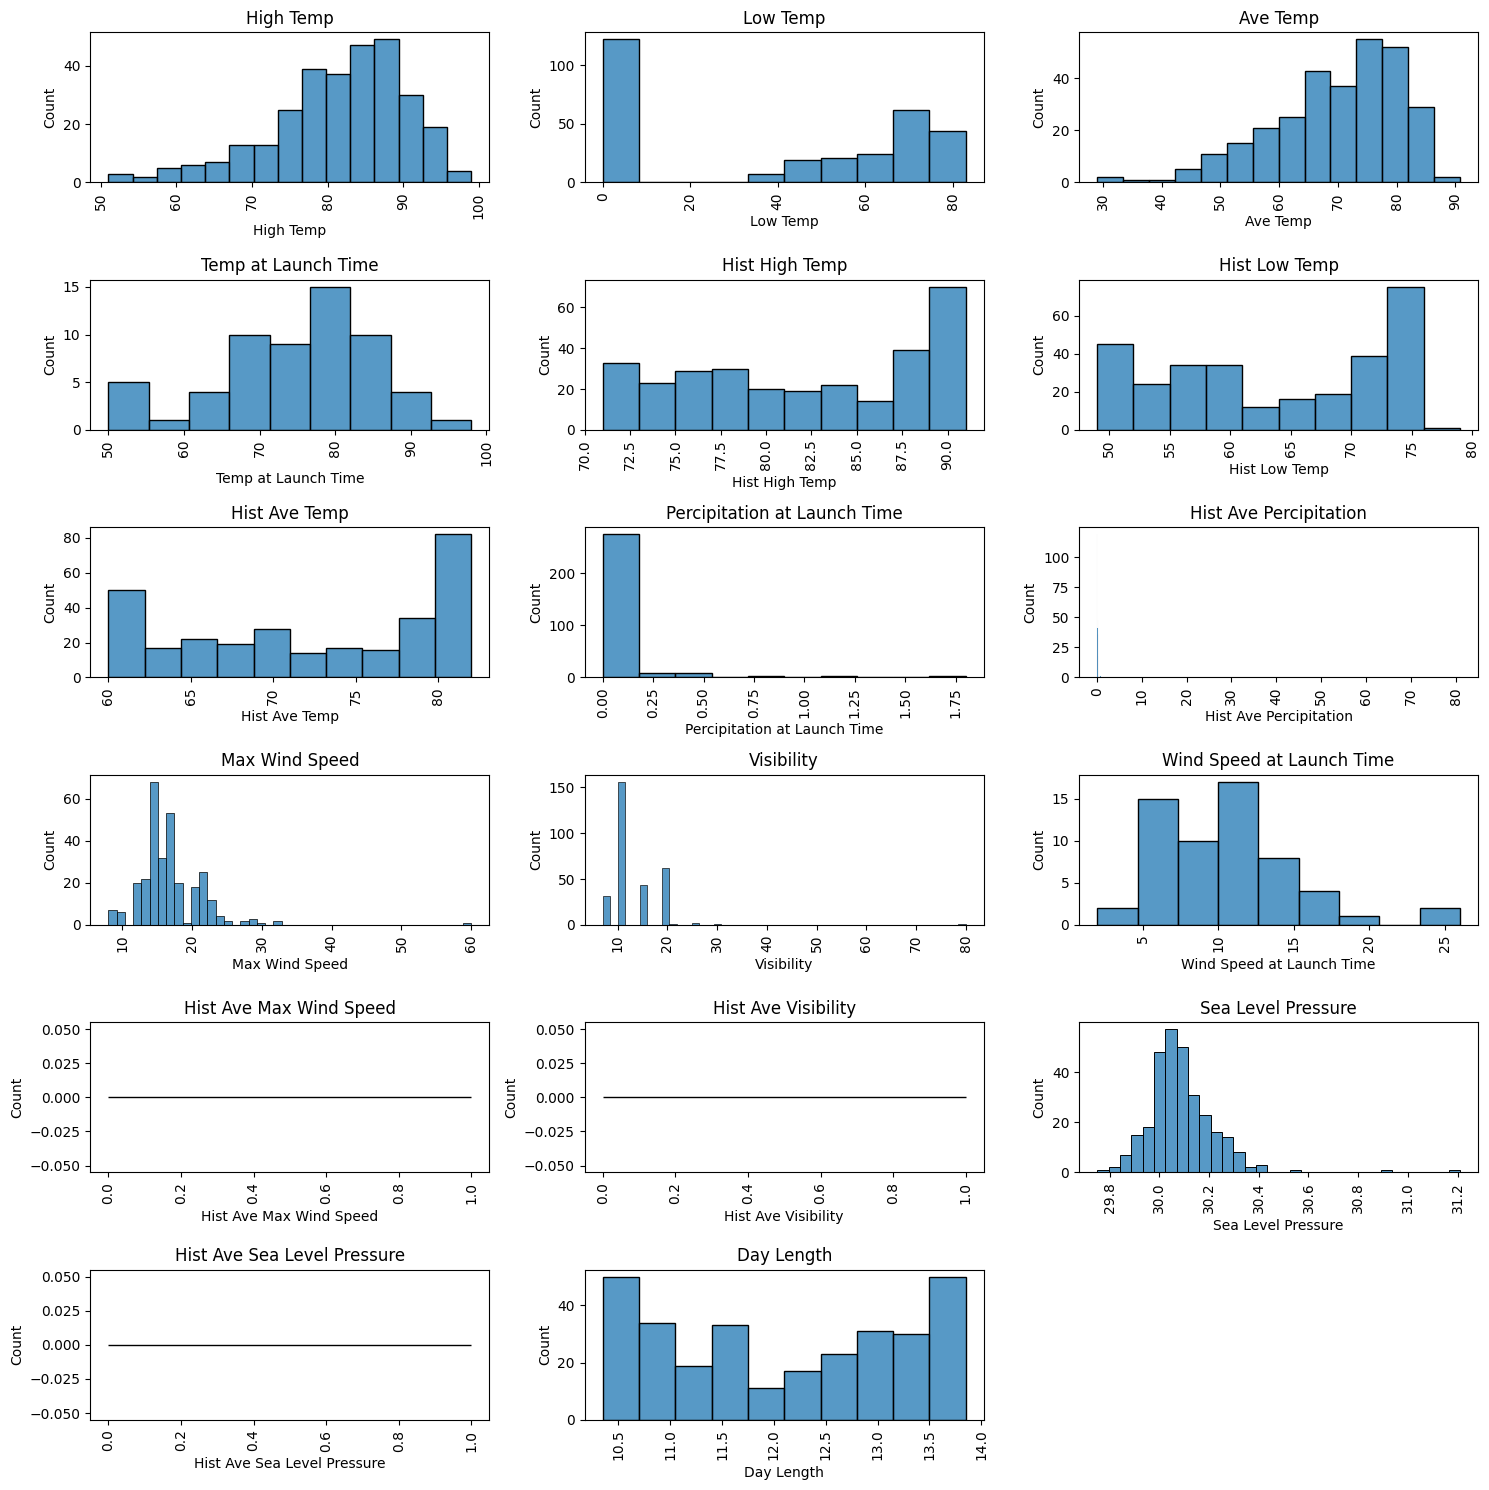

In [7]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
numeric_cols

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## 데이터 전처리

### 불필요한 컬럼 제거

In [8]:
# 사용하지 않을 컬럼
del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
df = rocket.drop(columns = del_cols)
df.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,E,16.0,15.0,NaN,30.22,10.433333,Cloudy
1,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,E,14.0,10.0,NaN,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,NE,15.0,10.0,11.0,30.25,10.416667,Cloudy
3,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,N,10.0,10.0,NaN,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,E,12.0,10.0,NaN,30.23,12.400000,Partly Cloudy


### 결측치 확인 및 처리

In [9]:
df.isnull().sum()

Location                       0
Crewed or Uncrewed           240
Launched?                    240
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [10]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기
df['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
df['Crewed or Uncrewed']
# Launched? --> 'N'으로 채우기
df['Launched?'].fillna('N',inplace=True)
df.isnull().sum()

C:\Users\EL0017\AppData\Local\Temp\ipykernel_4228\1844240090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
C:\Users\EL0017\AppData\Local\Temp\ipykernel_4228\1844240090.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Location                       0
Crewed or Uncrewed             0
Launched?                      0
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [11]:
# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])    #결측값을 최빈값으로 채운다(mode함수),iloc[0] : 제일 빈도가 높은 값
df.isnull().sum()

Location                       0
Crewed or Uncrewed             0
Launched?                      0
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 0
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      0
dtype: int64

In [12]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
numeric_cols = df.select_dtypes(include=['int','float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [13]:
df.isnull().sum()

Location                     0
Crewed or Uncrewed           0
Launched?                    0
High Temp                    0
Low Temp                     0
Ave Temp                     0
Temp at Launch Time          0
Hist High Temp               0
Hist Low Temp                0
Hist Ave Temp                0
Wind Direction               0
Max Wind Speed               0
Visibility                   0
Wind Speed at Launch Time    0
Sea Level Pressure           0
Day Length                   0
Condition                    0
dtype: int64

## 독립변수와 종속변수의 관계

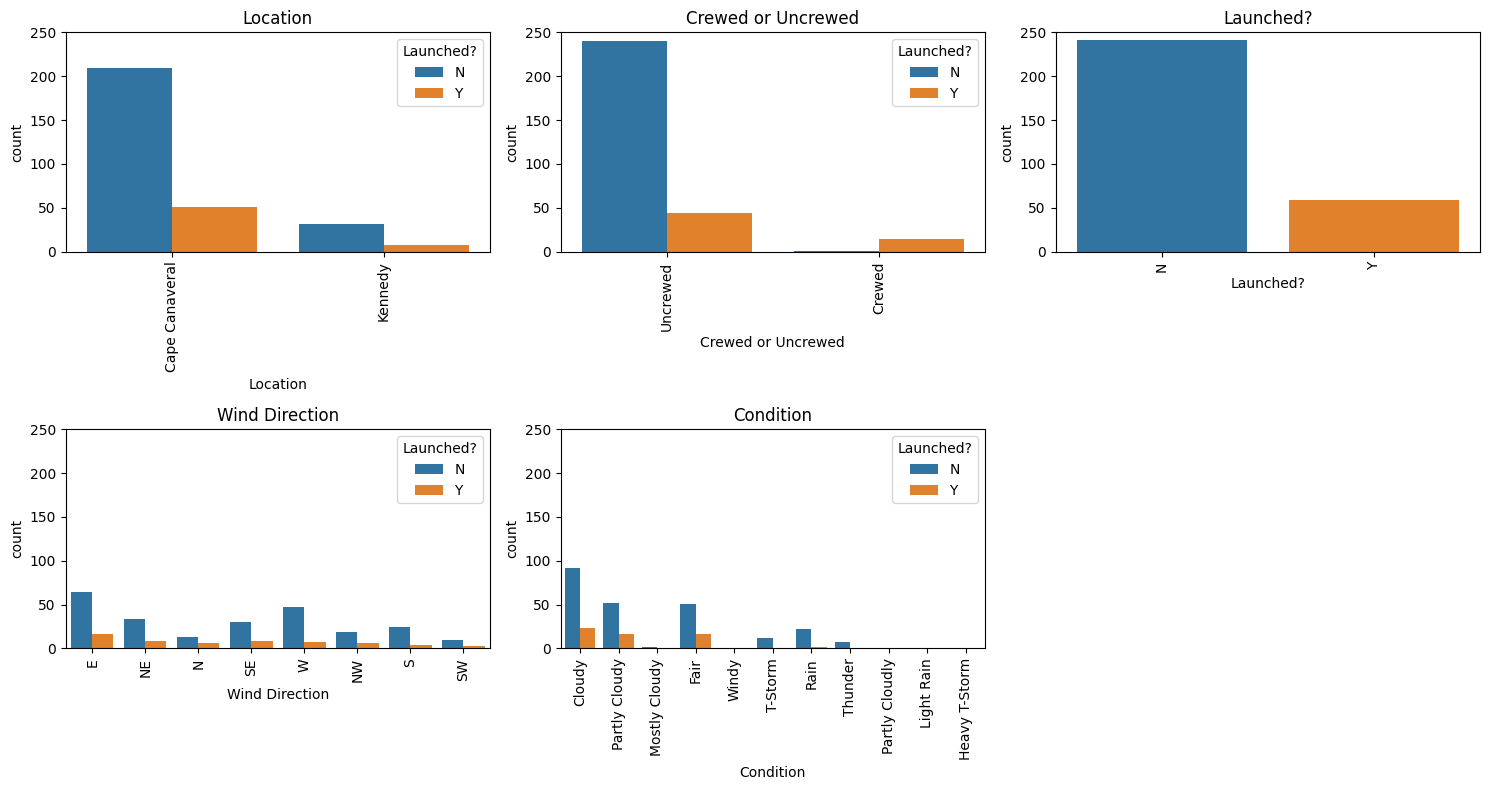

In [14]:
# 범주형 변수
i = 1
plt.figure(figsize=(15,8))
for col in obj_cols:
    plt.subplot(2,3,i)
    sns.countplot(data = df, x=col,hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
    i += 1
plt.tight_layout()

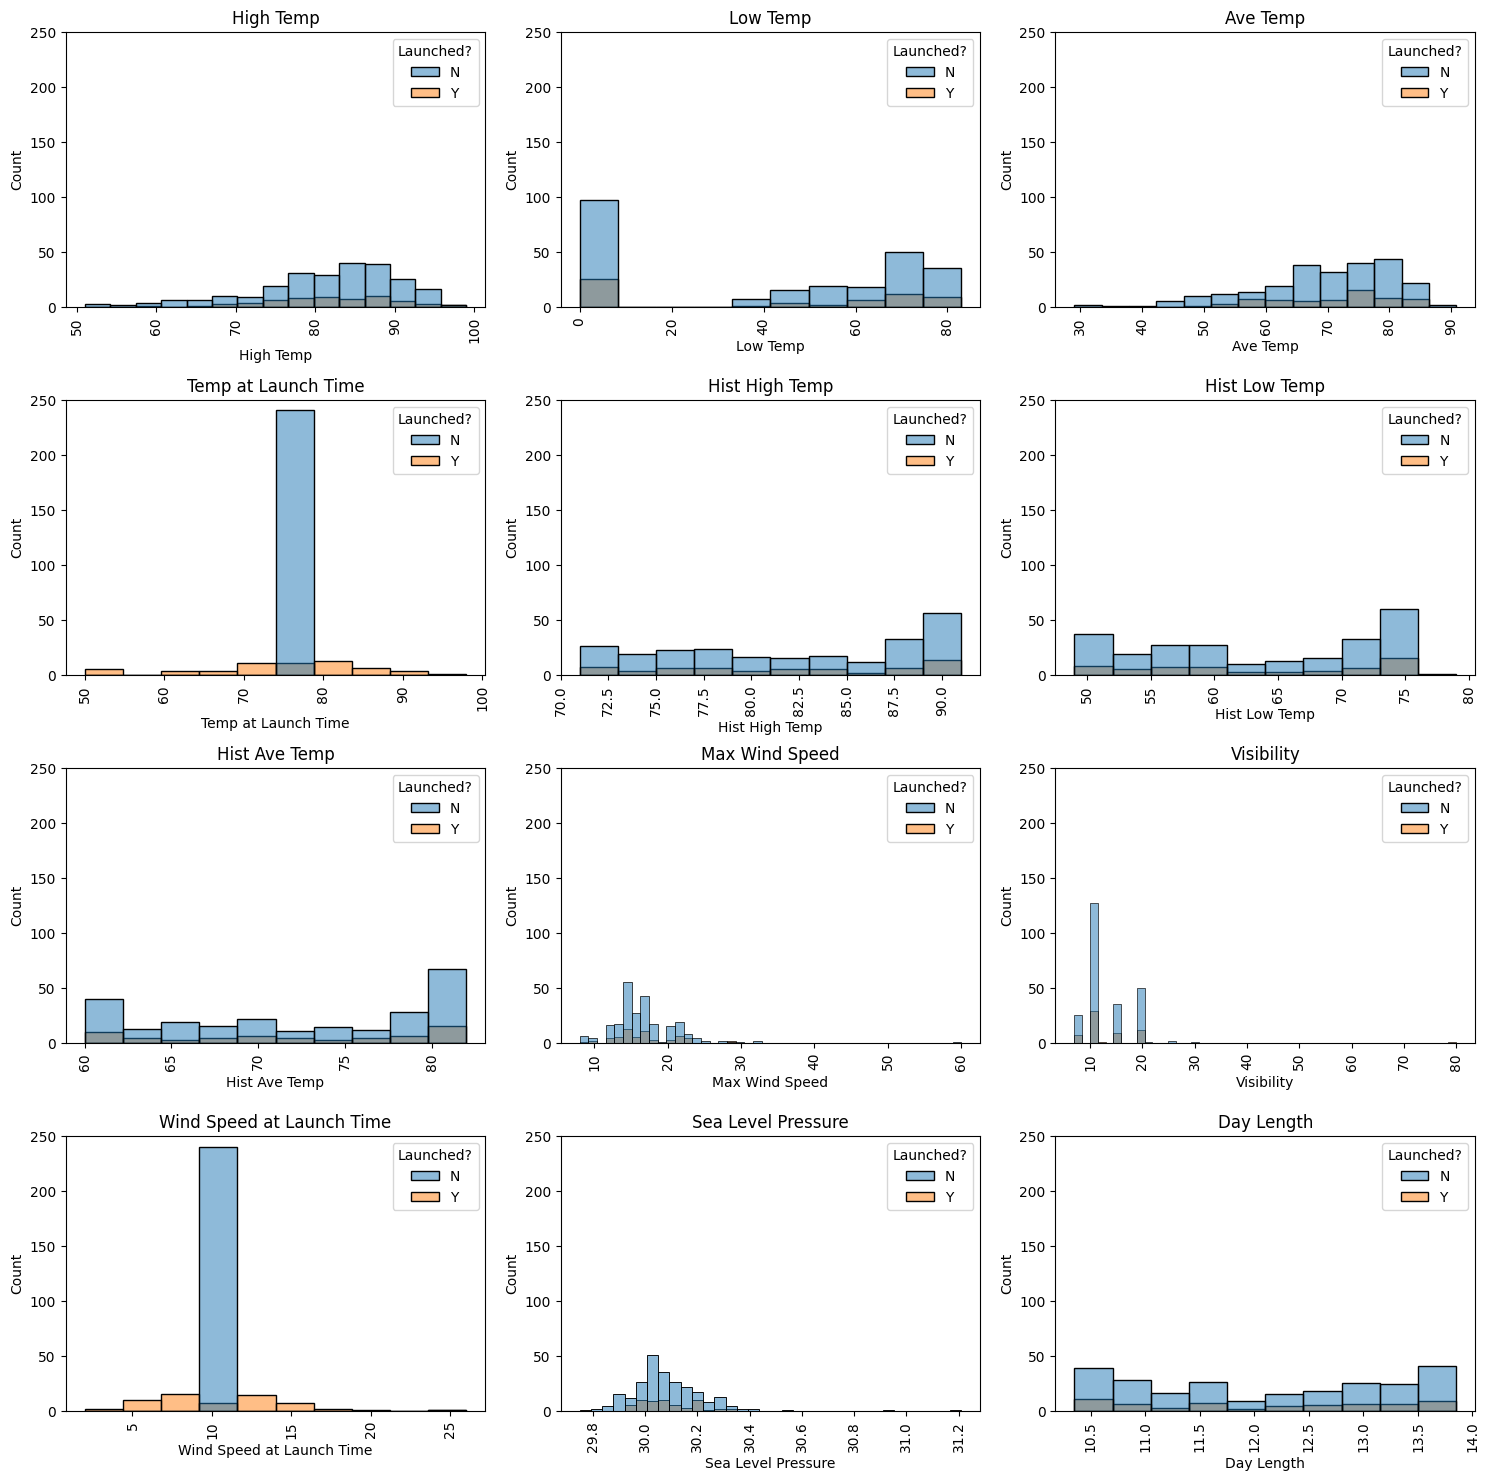

In [15]:
# 수치형 변수
i = 1
plt.figure(figsize=(15,15))
for col in numeric_cols:
    plt.subplot(4,3,i)
    sns.histplot(data = df, x=col,hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
    i += 1
plt.tight_layout()

# 변수 선택

In [16]:
X = df.drop(columns = 'Launched?')
y = df['Launched?']

In [17]:
X.head(3)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,Uncrewed,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,E,16.0,15.0,10.59322,30.22,10.433333,Cloudy
1,Cape Canaveral,Uncrewed,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,E,14.0,10.0,10.59322,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,NE,15.0,10.0,11.00000,30.25,10.416667,Cloudy


In [18]:
y.head(3)

0    N
1    N
2    Y
Name: Launched?, dtype: object


# 인코딩

## 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0

In [19]:
y = y.map({'Y' : 1, 'N' : 0})


In [20]:
y.value_counts()

Launched?
0    241
1     59
Name: count, dtype: int64

In [22]:
#obj_cols = obj_cols.drop('Launched?')



## 독립변수 레이블 인코딩

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
obj_cols = X.select_dtypes(include=['object'])
for col in obj_cols:
    X[col] = encoder.fit_transform(X[col])
X.head(3)

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0


In [24]:
X['Crewed or Uncrewed'].value_counts()


Crewed or Uncrewed
1    284
0     16
Name: count, dtype: int64

# 모델링

## 훈련세트/테스트세트 분할


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((225, 16), (75, 16), (225,), (75,))

## 모델 생성 및 훈련

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 분류 모델의 평가지표

In [32]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test))
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.93      0.97        15

    accuracy                           0.99        75
   macro avg       0.99      0.97      0.98        75
weighted avg       0.99      0.99      0.99        75

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        44

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



AUC : 0.9667


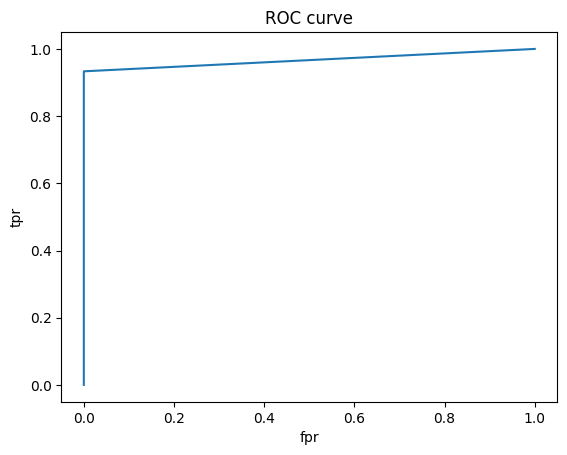

In [36]:
#ROC curve와 AUC 
from sklearn.metrics import roc_curve,roc_auc_score
pred_proba = model.predict_proba(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
# AUC
auc = roc_auc_score(y_test, pred_proba[:,1])
print(f'AUC : {auc:.4}')

# 모델의 학습 결과

In [49]:
df.loc[df['Launched?']=='Y'][['Wind Speed at Launch Time','Launched?']].sort_values('Wind Speed at Launch Time')

,Wind Speed at Launch Time,Launched?
207,2.00000,Y
282,4.00000,Y
122,5.00000,Y
182,5.00000,Y
172,5.00000,Y
247,5.00000,Y
127,6.00000,Y
17,6.00000,Y
217,6.00000,Y
227,6.00000,Y


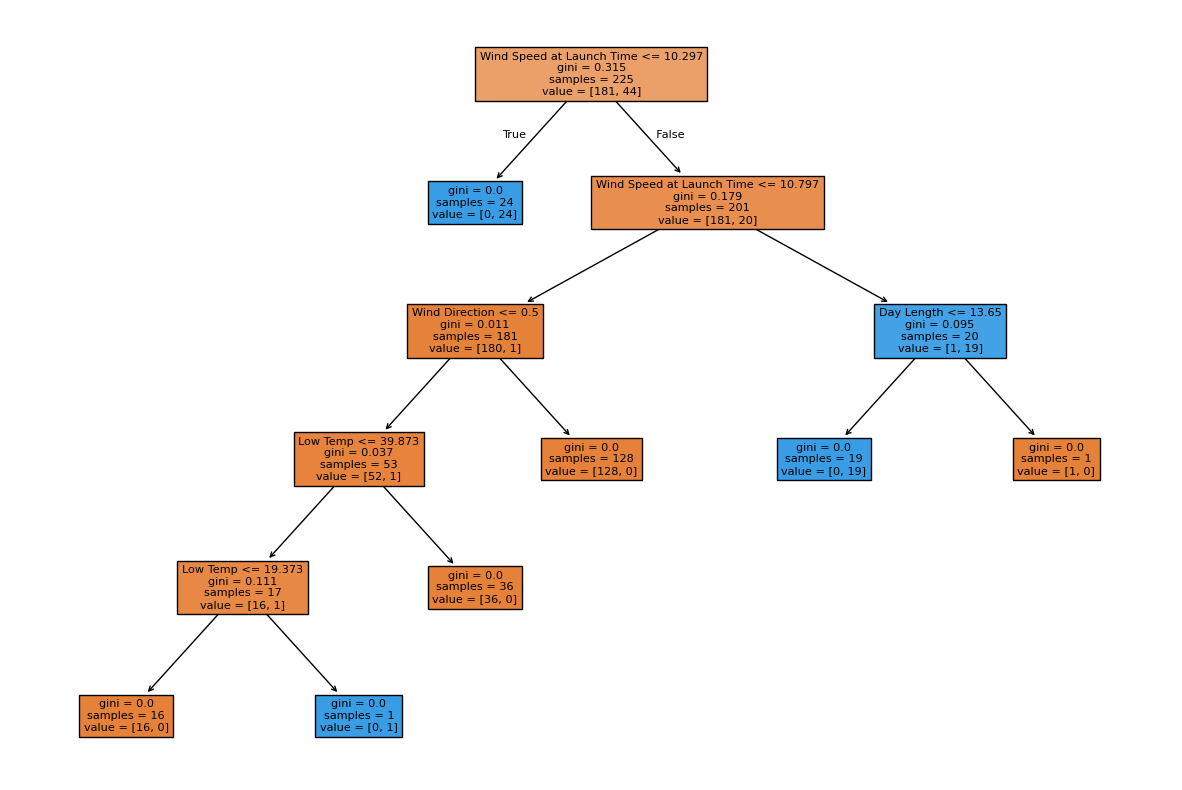

In [40]:
# 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [50]:
# 트리의 깊이
model.get_depth()

5

특성의 중요도 >>> [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.77190755e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.76970002e-04 0.00000000e+00 0.00000000e+00
 9.45064427e-01 0.00000000e+00 2.68395279e-02 0.00000000e+00]


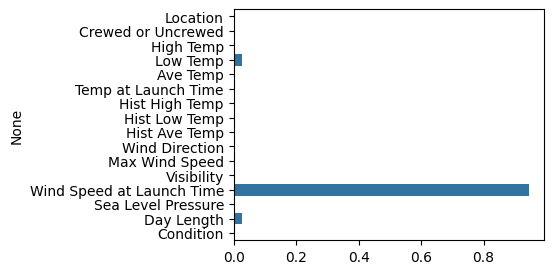

In [51]:
# 특성의 중요도
print(f'특성의 중요도 >>> {model.feature_importances_}')
plt.figure(figsize=(4,3))
sns.barplot(y=X.columns, x=model.feature_importances_)
plt.show()

# 변수 재선택

In [52]:
X = X.drop(['Wind Speed at Launch Time','Temp at Launch Time', 'Crewed or Uncrewed'], axis=1)

In [55]:
from sklearn.metrics import confusion_matrix
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(f'test>>{classification_report(y_test, pred_test)}')
print(confusion_matrix(y_test, pred_test))
print(f'train>>{classification_report(y_train, pred_train)}')

test>>              precision    recall  f1-score   support

           0       0.80      0.88      0.84        60
           1       0.22      0.13      0.17        15

    accuracy                           0.73        75
   macro avg       0.51      0.51      0.50        75
weighted avg       0.69      0.73      0.71        75

[[53  7]
 [13  2]]
train>>              precision    recall  f1-score   support

           0       0.85      0.94      0.89       181
           1       0.54      0.30      0.38        44

    accuracy                           0.81       225
   macro avg       0.69      0.62      0.64       225
weighted avg       0.79      0.81      0.79       225



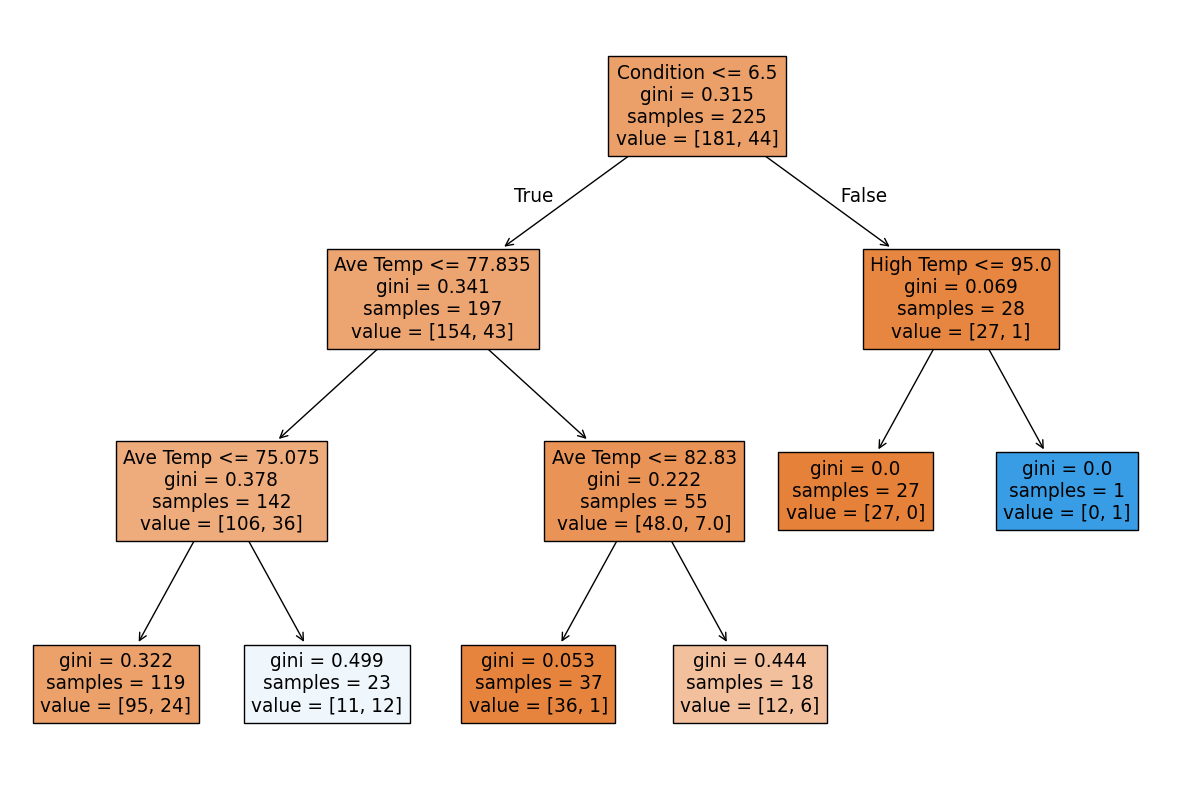

In [56]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# 불균형 데이터 처리

In [57]:
!pip install imblearn

In [58]:
# 오버샘플링
from imblearn.over_sampling import RandomOverSampler
# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled.value_counts())

(362, 13) (362,)
Launched?
1    181
0    181
Name: count, dtype: int64


In [78]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5,shuffle=True)
# 하이퍼파라미터 준비
parameters ={'max_depth':[3,4,5,6,7,8,9,10,11,12],
            'min_samples_split':[2,4]
            }
# GridSearchCV객체 생성

gscv = GridSearchCV(model, param_grid = parameters, cv = kf, refit = True)
gscv.fit(X_train_resampled,y_train_resampled)

pred_test = gscv.predict(X_test)
pred_train = gscv.predict(X_train)
print(classification_report(y_test, pred_test))
print(classification_report(y_train, pred_train))
 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        60
           1       0.16      0.20      0.18        15

    accuracy                           0.63        75
   macro avg       0.47      0.47      0.47        75
weighted avg       0.66      0.63      0.64        75

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       0.93      0.98      0.96        44

    accuracy                           0.98       225
   macro avg       0.96      0.98      0.97       225
weighted avg       0.98      0.98      0.98       225



In [79]:
pd.DataFrame(gscv.cv_results_)
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터 >>> {gscv.best_params_}')
print(f'최고 정확도 >>> {gscv.best_score_:.4f}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004548,0.000873,0.002757,0.000983,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.616438,0.698630,0.555556,0.694444,0.638889,0.640791,0.053077,19
1,0.005441,0.002989,0.002715,0.000982,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.616438,0.671233,0.555556,0.694444,0.638889,0.635312,0.047994,20
2,0.004436,0.000832,0.002812,0.000494,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.684932,0.698630,0.625000,0.694444,0.777778,0.696157,0.048704,17
3,0.004886,0.001646,0.002555,0.001049,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.684932,0.712329,0.611111,0.694444,0.777778,0.696119,0.053451,18
4,0.005017,0.001291,0.002731,0.000607,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.698630,0.780822,0.652778,0.819444,0.750000,0.740335,0.058986,15
5,0.002921,0.000494,0.001600,0.000534,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.698630,0.808219,0.638889,0.791667,0.750000,0.737481,0.062172,16
6,0.003238,0.000601,0.001782,0.000622,6,2,"{'max_depth': 6, 'min_samples_split': 2}",0.753425,0.794521,0.666667,0.888889,0.763889,0.773478,0.071645,12
7,0.003368,0.000877,0.001874,0.000751,6,4,"{'max_depth': 6, 'min_samples_split': 4}",0.726027,0.767123,0.652778,0.833333,0.763889,0.748630,0.059073,14
8,0.003330,0.000611,0.001626,0.000398,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.780822,0.821918,0.708333,0.861111,0.722222,0.778881,0.057974,11
9,0.002897,0.000289,0.001471,0.000369,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.753425,0.808219,0.694444,0.805556,0.722222,0.756773,0.044981,13


최적의 파라미터 >>> {'max_depth': 12, 'min_samples_split': 2}
최고 정확도 >>> 0.8758


# 다른 모델 적용

In [80]:
print(confusion_matrix(y_test,pred_test))

[[44 16]
 [12  3]]


In [84]:
from sklearn.metrics import accuracy_score, classification_report  
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           0       0.79      0.73      0.76        60
           1       0.16      0.20      0.18        15

    accuracy                           0.63        75
   macro avg       0.47      0.47      0.47        75
weighted avg       0.66      0.63      0.64        75

